This project was meant to be an introduction into classification algorithms and to study how decision boundaries were defined within them. We focused on 3 different algorithms:
* Logistic Regression
* Gaussian Naive Bayes Classifier
* K-Nearest Neighbor Classifier

Where we tested their decision boundaries on 3 different toy datasets. We also recieved an intro to the seaborn library to plot these datasets.

For this project, I have defined two functions. read_data_set() and plot_decision_boundary().
* read_data_set() - will read a .csv file and return the dataset, data, and target values.
* plot_decision_boundary() - will read a dataset, data, target values, and model to plot a decision boundary for the dataset (credit for this function goes to: https://hackernoon.com/how-to-plot-a-decision-boundary-for-machine-learning-algorithms-in-python-3o1n3w07)

These functions are defined below

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

%matplotlib inline

#function to read data set
def read_data_set(data_set_name):
    dataset = pd.read_csv(data_set_name, header=None)
    data = dataset[[0,1]]
    target = dataset[2]
    return dataset, data.values, target.values

def plot_decision_boundary(dataset, X, Y, model):
    #define boundaries of the domain
    min1, max1 = X[:,0].min() - 1, X[:,0].max() + 1
    min2, max2 = X[:,1].min() - 1, X[:,1].max() + 1

    #define the x and y scale
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)

    #turn into a grid
    xx, yy = np.meshgrid(x1grid, x2grid)

    #flatten grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    #create a horizontal stack
    grid = np.hstack((r1,r2))

    #make predicitons
    yhat = model.predict(grid)
    
    #reshape predictions into a grid
    zz = yhat.reshape(xx.shape)
    fig, ax = plt.subplots()
    #plot grid of x, y, and z
    ax.contourf(xx, yy, zz, cmap="Paired")

    #create scatter plot for samples in each class
    for class_value in range(2):
        
        #get row indexes for sample with this class
        row_ix = np.where(Y == class_value)

        #create scatter plot
        ax.scatter(X[row_ix, 0], X[row_ix, 1], cmap="Paired")
    return ax

To start, we must first extract the dataset, data, and targets from the .csv files. We do this by passing in the .csv file into the read_data_set() function as so:

In [2]:
dataset1, X_1, Y_1 = read_data_set("dataset1.csv")
dataset2, X_2, Y_2 = read_data_set("dataset2.csv")
dataset3, X_3, Y_3 = read_data_set("dataset3.csv")

Our first model is Logistic Regression. For a detailed view into Logistic Regression look into: https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression. We shall create the model, fit the model based on the data and targets from the first data set, then score that model.

In [3]:
log_reg_data1 = LogisticRegression()
log_reg_data1.fit(X_1, Y_1)
log_reg_data1.score(X_1, Y_1)

1.0

Doing this gives us a score of 1. Suggesting a perfect fit for our dataset. This seems a bit odd, but when seeing the dataset this becomes much more clear. This will be done later.

For now, we can do the same for data set 2

In [4]:
log_reg_data2 = LogisticRegression()
log_reg_data2.fit(X_2, Y_2)
log_reg_data2.score(X_2, Y_2)

0.525

Doing this gives us a drastically different score. To figure out why, we can plot both datasets, analyze them, and determine why there is such a discrepency

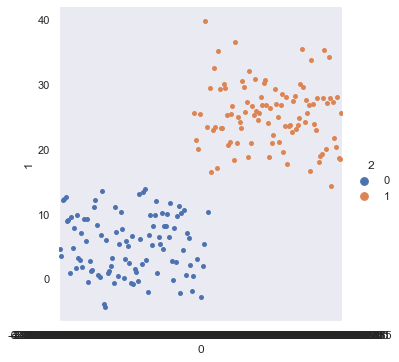

In [5]:
sns.set_theme(style="dark")
sns.catplot(x="0", y="1",hue="2", data=dataset1.rename(columns=lambda x: str(x))) #lambda function used to create column names for seaborn

Considering how Logistic Regression seperates data with a line of best seperation, it is clear now why a score of 1 is possible for the first data set. This is a different story for the second data set though.

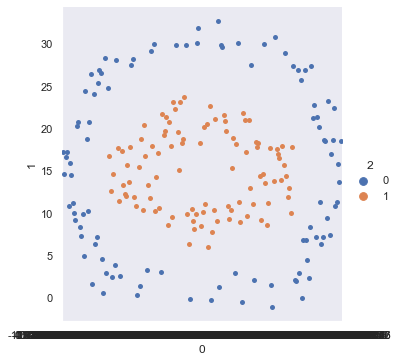

In [6]:
sns.catplot(x="0", y="1", hue="2", data=dataset2.rename(columns=lambda x: str(x)))

With this dataset, there is no clear way to fit a line of best seperation to the data. 

However, we can visualize this seperation! This however will come later. For now, we can look into applying a Gaussian Naive Bayes Classifier to both datasets

In [7]:
gnb1 = GaussianNB()
gnb1.fit(X_1, Y_1)
gnb1.score(X_1, Y_1)

1.0

In [8]:
gnb2 = GaussianNB()
gnb2.fit(X_2, Y_2)
gnb2.score(X_2, Y_2)

1.0

Doing this gives us a score of 1 for each data set. For a better understanding of why this is I like to think of the Gaussian Naive Bayes Classifier as a heatmap of where the datapoints lie. Traditional representations of this classifier depict it as a contour plot. This stems from the "Gaussian" part of the classifier

For a very brief description, application, and visualization of this model take a look at: https://jakevdp.github.io/PythonDataScienceHandbook/05.05-naive-bayes.html. For a more in depth look into the visualization of the classifier take a look at the lecture slides for Lecture 6 from Carnegie Mellon University's Intro To Machine Learning class https://www.cs.cmu.edu/~mgormley/courses/10601-s17/slides/lecture6-gnb.pdf.

Looking into the k-nearest neighbor classifier we see the same trend. Both datasets give off a score of 1. 

In [9]:
knn1 = KNeighborsClassifier()
knn1.fit(X_1, Y_1)
knn1.score(X_1, Y_1)

1.0

In [10]:
knn2 = KNeighborsClassifier()
knn2.fit(X_2, Y_2)
knn2.score(X_2, Y_2)

1.0

To better understand these score values we can look into the decision boundaries for each model against the datasets. Starting off with Logistic regression we see:

<AxesSubplot:>

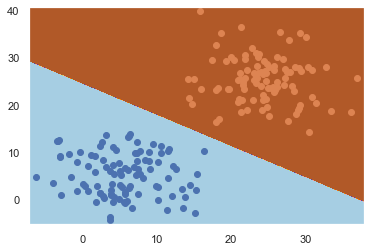

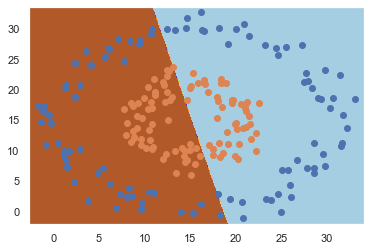

In [11]:
plot_decision_boundary(dataset1, X_1, Y_1, log_reg_data1)
plot_decision_boundary(dataset2, X_2, Y_2, log_reg_data2)

Which supports our previous hypothesis as to why there is such a discrepency between the two datasets and their scores. For dataset 1, there is a clear way to plot a line of seperation between the two datat points. However for dataset 2 It seems the plotting that line will result in a roughly 50/50 split within each class.

Going onto Gaussian Naive Bayes we see:

<AxesSubplot:>

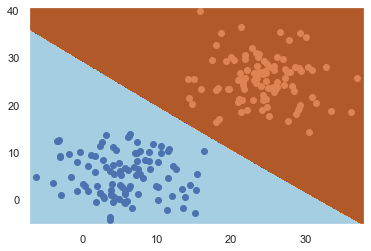

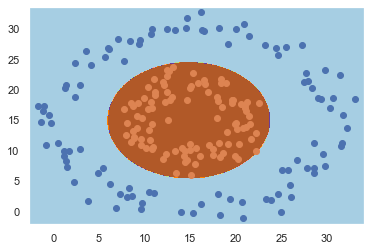

In [12]:
plot_decision_boundary(dataset1, X_1, Y_1, gnb1)
plot_decision_boundary(dataset2, X_2, Y_2, gnb2)

This also clearly shows why we get perfect scores. For dataset 1 it is clear where the contour peak lies. The same comes with dataset 2.

And finally the K-Nearest Neighbor Classifier

<AxesSubplot:>

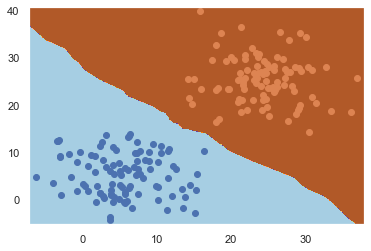

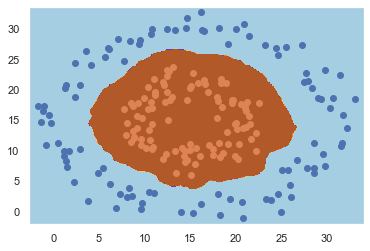

In [13]:
plot_decision_boundary(dataset1, X_1, Y_1, knn1)
plot_decision_boundary(dataset2, X_2, Y_2, knn2)

With KNN we get a clear decision boundary. This is because of how every classes datapoints are tightly grouped together.

However, these expirements were all designed around toy data to make clear cut decision boundaries for the seperate models. Lets try this on a dataset that is more interesting.

Plotting dataset3 we see:

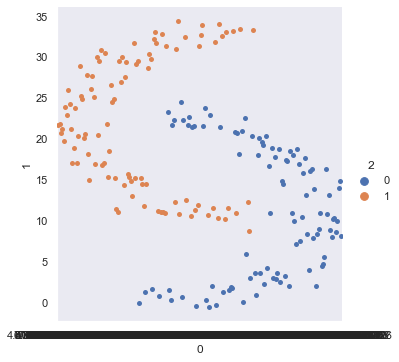

In [14]:
sns.catplot(x="0", y="1", hue="2", data=dataset3.rename(columns=lambda x: str(x)))

A few quick things to note about this dataset:

* For Logistic Regression there doesn't seem to be a clear line of seperation
* For GNB the expected contours seem to fit quite well, but there does seem to be some mix with the data
* For KNN, since the datapoints are tightly packed we can expect a relatively high score.

Starting with Logistic regression we get:

0.87


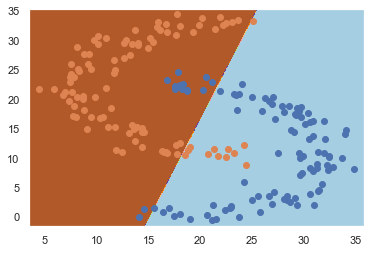

In [15]:
log_reg_data3 = LogisticRegression()
log_reg_data3.fit(X_3, Y_3)
score = log_reg_data3.score(X_3, Y_3)
plot_decision_boundary(dataset3, X_3, Y_3, log_reg_data3)
print(score)

Which gives us a relatively high score, but as expected there is some mixin with the data itself.

Checking GNB we see:

0.885


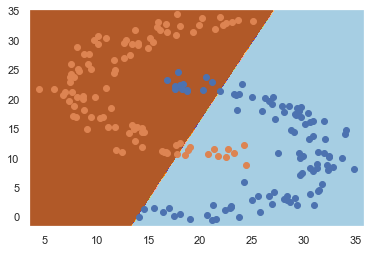

In [16]:
gnb3 = GaussianNB()
gnb3.fit(X_3, Y_3)
score = gnb3.score(X_3, Y_3)
plot_decision_boundary(dataset3, X_3, Y_3, gnb3)
print(score)

Which is an overall improvement over Logistic Regression, but doesn't increase the score by too much.

However KNN gives us a completely different product:

1.0


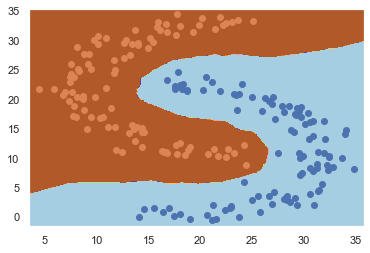

In [17]:
neigh3 = KNeighborsClassifier()
neigh3.fit(X_3, Y_3)
score = neigh3.score(X_3, Y_3)
plot_decision_boundary(dataset3, X_3, Y_3, neigh3)
print(score)

KNN gives us a perfect score as expected. 